In [1]:
import tsplib95
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eil51 = tsplib95.load('TSP-Configurations/eil51.tsp')

In [3]:
len(eil51.node_coords)

51

In [4]:
list(eil51.node_coords.items())[0][1]

[37, 52]

In [5]:
dists = np.zeros((51, 2))
node_x = np.zeros(51)
node_y = node_x.copy()

for i in range(51):
    dists[i][:] = list(eil51.node_coords.items())[i][1]
    node_x[i] = list(eil51.node_coords.items())[i][1][0]
    node_y[i] = list(eil51.node_coords.items())[i][1][1]

In [6]:
def distance_matrix(x_coordinates, y_coordinates):
    """_This function takes the x coordinates and y coordinates
        arrays as input, then compute the distance matrix as output_

    Args:
        x_coordinates (_numpy.array_): _Array containing the x_coordinates
        for all cities_
        y_coordinates (_numpy.array_): _Array containing the y_coordinates
        for all cities_

    Returns:
        _numpy.ndarray_: _The distance matrix for all cities_
    """

    # initialize the distance matrix
    dists_matrix = np.zeros((len(x_coordinates), len(x_coordinates)))

    for i in range(len(x_coordinates)):
        # compute (x1-x2)^2
        dists_matrix[i] = (x_coordinates - x_coordinates[i])**2
        # compute (y1-y2)^2
        dists_matrix[i] += (y_coordinates - y_coordinates[i])**2
    
    # compute sqrt((x1-x2)^2 + (y1-y2)^2) (Euclidean)
    return np.sqrt(dists_matrix)

In [7]:
dists_matrix = distance_matrix(node_x, node_y)

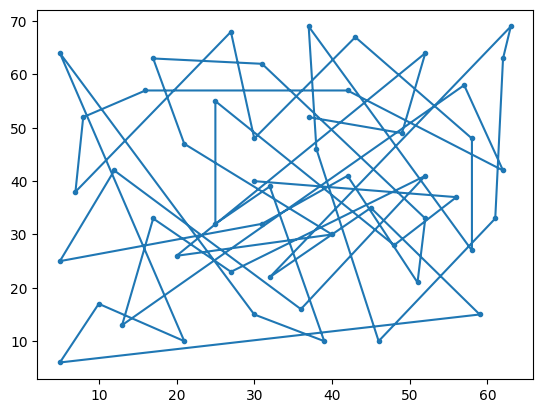

In [14]:
plt.scatter(node_x, node_y, marker='.')
plt.plot(node_x, node_y)

In [11]:
def objective_function(solution, distance_matrix):
    """_This function takes current solution (the city visiting
        sequence) and the distance matrix as input, then compute
        the total traveling distance for current solution as output_

    Args:
        solution (_numpy.array_): _The city visiting sequence_
        distance_matrix (_numpy.ndarray_): _The distance matrix_

    Returns:
        _float_: _the total traveling distance for current solution_
    """

    # Create the route tuple of adjcent cities ([1, 2], [2, 3], ...)
    route = np.array((solution[:-1], solution[1:])).T

    # Compute and return the total distance
    return sum(distance_matrix[route[:, 0], route[:, 1]])

In [12]:
test = np.arange(0, 51)
rng = np.random.default_rng()
test_1 = rng.permuted(test)

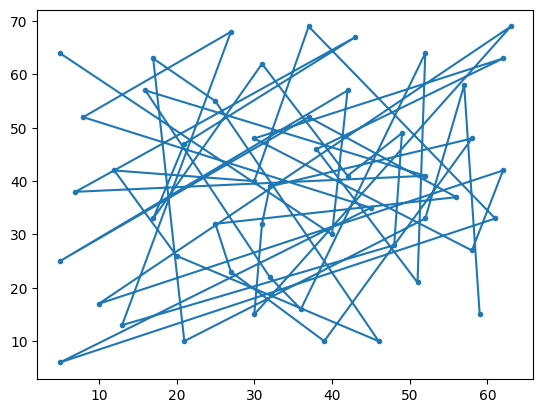

In [16]:
x_test = node_x[test_1]
y_test = node_y[test_1]

plt.scatter(x_test, y_test, marker='.')
plt.plot(x_test, y_test)

In [153]:
objective_function(test, dists_matrix)

1299.575900454896

In [160]:
objective_function(test_1, dists_matrix)

1724.2364388784163

In [165]:
def read_TSP(file_path: str):
    """_This function takes the file path of TSP problem set as
        input, load the file then take the x and y coordinates of
        cities as output_

    Args:
        file_path (_str_): _the file path of TSP problem set_

    Returns:
        _numpy.array_: _Euclidean coordinates of cities_
    """
    
    # Load the TSP problem set
    problem = tsplib95.load(file_path)
    # Count the number of cities
    n_cities = len(problem.node_coords)
    
    # Initialize the x and y coordinates
    x_coordinates = np.zeros(n_cities)
    y_coordinates = np.zeros(n_cities)

    # Load the x and y coordinates for each city as output
    for i in range(n_cities):
        x_coordinates[i] = list(problem.node_coords.items())[i][1][0]
        y_coordinates[i] = list(problem.node_coords.items())[i][1][1]
        
    return x_coordinates, y_coordinates
        

In [27]:
def Temperature(n, a, b):
    T = a / np.log(n + b)
    return T

In [28]:
def two_opt_swap(route, v1, v2):
    
    return np.concatenate((route[0:v1], route[v2:-len(route)+v1-1:-1],route[v2+1:len(route)]))

In [ ]:
# Calculate the euclidian distance in n-space of the route r traversing cities c, ending at the path start.
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) for p in range(len(r))])
# Reverse the order of all elements from element i to element k in array r.
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def two_opt(cities,improvement_threshold): # 2-opt Algorithm adapted from https://en.wikipedia.org/wiki/2-opt
    route = np.arange(cities.shape[0]) # Make an array of row numbers corresponding to cities.
    improvement_factor = 1 # Initialize the improvement factor.
    best_distance = path_distance(route,cities) # Calculate the distance of the initial path.
    while improvement_factor > improvement_threshold: # If the route is still improving, keep going!
        distance_to_beat = best_distance # Record the distance at the beginning of the loop.
        for swap_first in range(1,len(route)-2): # From each city except the first and last,
            for swap_last in range(swap_first+1,len(route)): # to each of the cities following,
                new_route = two_opt_swap(route,swap_first,swap_last) # try reversing the order of these cities
                new_distance = path_distance(new_route,cities) # and check the total distance with this modification.
                if new_distance < best_distance: # If the path distance is an improvement,
                    route = new_route # make this the accepted best route
                    best_distance = new_distance # and update the distance corresponding to this route.
        improvement_factor = 1 - best_distance/distance_to_beat # Calculate how much the route has improved.
    return route # When the route is no longer improving substantially, stop searching and return the route.

In [79]:
problem = tsplib95.load('TSP-Configurations/a280.tsp')

In [84]:
node_x = np.zeros(len(problem.node_coords))
node_y = node_x.copy()

for i in range(len(problem.node_coords)):
    node_x[i] = list(problem.node_coords.items())[i][1][0]
    node_y[i] = list(problem.node_coords.items())[i][1][1]

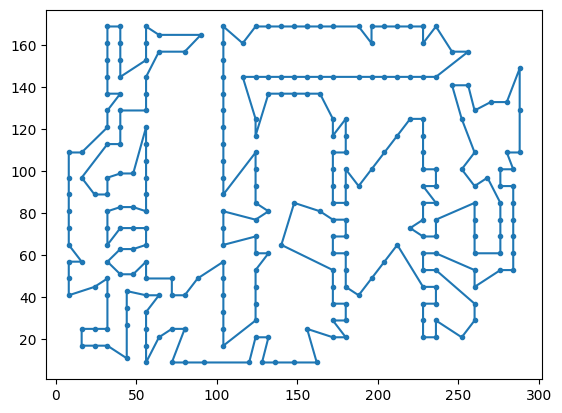

In [117]:
i_sol = np.load('initial_sol.npy')
b_sol = np.load('best_sol.npy')

x_best = node_x[b_sol]
y_best = node_y[b_sol]

plt.scatter(x_best, y_best, marker='.')
plt.plot(x_best, y_best)

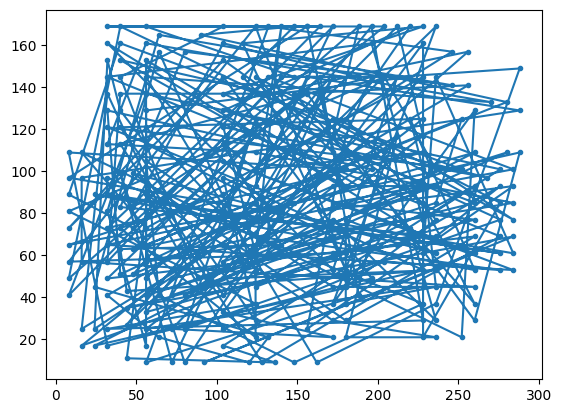

In [119]:
x_best = node_x[i_sol]
y_best = node_y[i_sol]

plt.scatter(x_best, y_best, marker='.')
plt.plot(x_best, y_best)

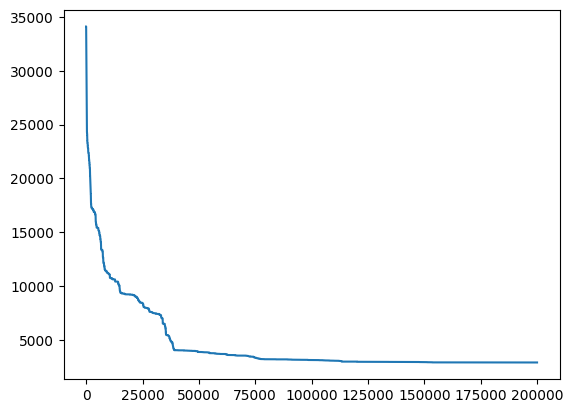

In [118]:
costs = np.load('costs.npy')

plt.plot(costs)